In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

### Fetching Flight data

In [2]:
# fetch data 

mco_syr_sw_data = pd.read_csv('flight_data/mco_syr_sw_combined.csv')
mco_syr_jb_data = pd.read_csv('flight_data/mco_syr_jb_combined.csv')
jfk_syr_jb_data = pd.read_csv('flight_data/jfk_syr_jb_combined.csv')
jfk_syr_end_data = pd.read_csv('flight_data/jfk_syr_dl_combined.csv')
ord_syr_ua_data = pd.read_csv('flight_data/ord_syr_ua_combined.csv')
ord_syr_aa_data = pd.read_csv('flight_data/ord_syr_aa_combined.csv')

In [3]:
dfs = [ord_syr_aa_data,ord_syr_ua_data,jfk_syr_end_data,jfk_syr_jb_data,mco_syr_jb_data,mco_syr_sw_data]
main_data = pd.concat(dfs,axis = 0)
main_data.head()
len(main_data)

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Wheels-on Time,Taxi-In time (Minutes),arr_Delay_Carrier,arr_Delay_Weather,arr_Delay_National_Aviation_System,arr_Delay_Security,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year
0,0,MQ,2020-01-04,"3,580.00",N240NN,SYR,7:55,8:21,112.00,87.00,...,10:43,5.00,0.00,0.00,0.00,0.00,0.00,10,5,2020
1,1,MQ,2020-01-11,"3,946.00",N247NN,SYR,15:00,15:09,108.00,132.00,...,18:13,8.00,9.00,0.00,24.00,0.00,0.00,17,5,2020
2,2,MQ,2020-01-18,"3,946.00",N265NN,SYR,15:00,16:27,108.00,147.00,...,19:45,9.00,0.00,4.00,39.00,0.00,83.00,17,5,2020
3,3,MQ,2020-01-25,"3,946.00",N281NN,SYR,15:00,14:55,108.00,126.00,...,17:56,5.00,0.00,0.00,0.00,0.00,0.00,17,5,2020
4,4,MQ,2020-02-01,"3,946.00",N283NN,SYR,15:00,14:57,108.00,99.00,...,17:32,4.00,0.00,0.00,0.00,0.00,0.00,17,5,2020


8661

In [4]:
main_data.isna().sum()

Unnamed: 0                             0
Carrier_Code                           0
Date                                   0
Flight_Number                          0
Tail_Number                           74
Destination_Airport                    0
Scheduled departure time               0
Actual departure time                  0
Scheduled elapsed time (Minutes)       0
Actual elapsed time (Minutes)          0
Departure delay (Minutes)              0
Wheels-off time                        0
Taxi-Out time (Minutes)                0
dep_Delay_Carrier                      0
dep_Delay_Weather                      0
dep_Delay_National_Aviation_System     0
dep_Delay_Security                     0
dep_Delay_Late_Aircraft_Arrival        0
dep_hour                               0
dep_day                                0
dep_year                               0
dep_order                              0
Origin_Airport                         0
Scheduled Arrival Time                 0
Actual Arrival T

In [5]:
main_data.dtypes

Unnamed: 0                              int64
Carrier_Code                           object
Date                                   object
Flight_Number                         float64
Tail_Number                            object
Destination_Airport                    object
Scheduled departure time               object
Actual departure time                  object
Scheduled elapsed time (Minutes)      float64
Actual elapsed time (Minutes)         float64
Departure delay (Minutes)             float64
Wheels-off time                        object
Taxi-Out time (Minutes)               float64
dep_Delay_Carrier                     float64
dep_Delay_Weather                     float64
dep_Delay_National_Aviation_System    float64
dep_Delay_Security                    float64
dep_Delay_Late_Aircraft_Arrival       float64
dep_hour                                int64
dep_day                                 int64
dep_year                                int64
dep_order                         

### Preprocessing flight data

In [6]:
sub_data = main_data.drop(columns = ['Unnamed: 0','Destination_Airport','Actual departure time','Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)',
                         'Wheels-off time','Taxi-Out time (Minutes)','dep_Delay_Carrier',
                         'dep_Delay_Weather','dep_Delay_National_Aviation_System','dep_Delay_Security','dep_Delay_Late_Aircraft_Arrival',
                         'dep_year','Actual Arrival Time','Wheels-on Time','Taxi-In time (Minutes)','arr_Delay_Carrier','arr_Delay_Weather',
                         'arr_Delay_National_Aviation_System','arr_Delay_Security','arr_Delay_Late_Aircraft_Arrival','arr_year'])

In [7]:
sub_data.dtypes


Carrier_Code                  object
Date                          object
Flight_Number                float64
Tail_Number                   object
Scheduled departure time      object
Departure delay (Minutes)    float64
dep_hour                       int64
dep_day                        int64
dep_order                     object
Origin_Airport                object
Scheduled Arrival Time        object
Arrival Delay (Minutes)      float64
arr_hour                       int64
arr_day                        int64
dtype: object

In [8]:
sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day
0,MQ,2020-01-04,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,10:47,1.00,10,5
1,MQ,2020-01-11,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,17:48,33.00,17,5
2,MQ,2020-01-18,"3,946.00",N265NN,15:00,87.00,15,5,latter,ORD,17:48,126.00,17,5
3,MQ,2020-01-25,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,17:48,13.00,17,5
4,MQ,2020-02-01,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,17:48,-12.00,17,5


In [9]:
sub_data['dep_min'] = sub_data['Scheduled departure time'].str.split(":").str[1].astype('int64')
sub_data['Date'] = pd.to_datetime( sub_data['Date'],format ="%Y-%m-%d")
sub_data['Date'] = sub_data['Date'].dt.strftime('%m/%d/%Y')
# sub_data['dep_minutes'] = 0
# sub_data['dep_minutes'] = sub_data['dep_minutes'].astype('object')
sub_data['dep_hours'] = sub_data['dep_hour'].astype('object')
sub_data['dep_min'] = sub_data['dep_min'].astype('object')
sub_data['arr_min'] = main_data['Scheduled Arrival Time'].str.split(":").str[1].astype('int64')
# sub_data['arr_minutes'] = 0
# sub_data['arr_minutes'] = sub_data['arr_minutes'].astype('object')
sub_data['arr_hours'] = sub_data['arr_hour'].astype('object')
sub_data['arr_min'] = sub_data['arr_min'].astype('object')
sub_data['Flight_Number'] = main_data['Flight_Number'].astype('object')
sub_data['dep_hour'] = main_data['dep_hour'].astype('object')
sub_data['dep_day'] = main_data['dep_day'].astype('object')
sub_data['arr_hour'] = main_data['arr_hour'].astype('object')
sub_data['arr_day'] = main_data['arr_day'].astype('object')
conditions = [
    (sub_data['Arrival Delay (Minutes)'] > 5),
    (sub_data['Arrival Delay (Minutes)'] >=-5) & (sub_data['Arrival Delay (Minutes)'] <= 5),
    (sub_data['Arrival Delay (Minutes)'] < -5)
]
conditions2 = [
    (sub_data['Departure delay (Minutes)'] > 5),
    (sub_data['Departure delay (Minutes)'] >=-5) & (sub_data['Departure delay (Minutes)'] <= 5),
    (sub_data['Departure delay (Minutes)'] < -5)
]
choices = [2,1,0]
sub_data['arr_status'] = np.select(conditions, choices)
sub_data['dep_status'] = np.select(conditions2, choices)
sub_data.dtypes
sub_data.head()
len(sub_data)

Carrier_Code                  object
Date                          object
Flight_Number                 object
Tail_Number                   object
Scheduled departure time      object
Departure delay (Minutes)    float64
dep_hour                      object
dep_day                       object
dep_order                     object
Origin_Airport                object
Scheduled Arrival Time        object
Arrival Delay (Minutes)      float64
arr_hour                      object
arr_day                       object
dep_min                       object
dep_hours                     object
arr_min                       object
arr_hours                     object
arr_status                     int32
dep_status                     int32
dtype: object

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day,dep_min,dep_hours,arr_min,arr_hours,arr_status,dep_status
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,10:47,1.00,10,5,55,7,47,10,1,2
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,17:48,33.00,17,5,0,15,48,17,2,2
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,87.00,15,5,latter,ORD,17:48,126.00,17,5,0,15,48,17,2,2
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,17:48,13.00,17,5,0,15,48,17,2,1
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,17:48,-12.00,17,5,0,15,48,17,0,1


8661

In [10]:
#sub_data.to_csv('sub_data.csv', index=False)

In [11]:
len(sub_data)
sub_data= sub_data[sub_data['Arrival Delay (Minutes)'] < 120]
len(sub_data)

8661

8405

### Fetching Weather data

In [12]:
# Read and process weather data files for each airport

jfk_weather_data = pd.read_csv('weather_data/JFK_weather_data_hourly_processed.csv')
syr_weather_data = pd.read_csv('weather_data/SYR_weather_data_hourly_processed.csv')
ord_weather_data = pd.read_csv('weather_data/ORD_weather_data_hourly_processed.csv')
mco_weather_data = pd.read_csv('weather_data/MCO_weather_data_hourly_processed.csv')

# Combine weather data for all airports
weather_dfs = [jfk_weather_data, ord_weather_data, mco_weather_data]
weather_data = pd.concat(weather_dfs, axis=0)
#weather_data['dep_minutes'] = weather_data['dep_minutes'].astype('object')
weather_data['dep_hours'] = weather_data['dep_hours'].astype('object')
#syr_weather_data['arr_minutes'] = syr_weather_data['arr_minutes'].astype('object')
syr_weather_data['arr_hours'] = syr_weather_data['arr_hours'].astype('object')
weather_data.head()
syr_weather_data.head()
weather_data.dtypes
syr_weather_data.dtypes




,dep_azimuth,dep_clouds,dep_dewpt,dep_elev_angle,dep_h_angle,dep_precip,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd,Date,dep_hours,Origin_Airport
0,261.20,100,3.80,-26.20,NaN,0.00,1002,final,88,0.00,5.60,16,Overcast clouds,804,220,6.00,3.60,12/31/2019,19,JFK
1,270.50,100,3.90,-37.50,NaN,0.25,1003,final,85,0.00,6.30,16,Overcast clouds,804,220,6.80,5.37,12/31/2019,20,JFK
2,281.40,100,3.70,-48.80,NaN,0.00,1003,final,82,0.00,6.50,16,Overcast clouds,804,255,8.00,7.45,12/31/2019,21,JFK
3,296.30,100,1.60,-59.60,NaN,0.00,1002,final,73,0.00,6.10,16,Overcast clouds,804,270,9.30,6.70,12/31/2019,22,JFK
4,320.80,100,0.70,-68.60,NaN,0.00,1003,final,69,0.00,6.00,16,Overcast clouds,804,270,10.40,7.45,12/31/2019,23,JFK


,arr_azimuth,arr_clouds,arr_dewpt,arr_elev_angle,arr_h_angle,arr_precip,arr_pres,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd,Date,arr_hours
0,260.90,100,-2.30,-24.90,NaN,0.00,987,final,78,0.00,1.10,14,Overcast clouds,804,240,9.60,4.59,12/31/2019,19
1,270.70,100,-3.00,-35.80,NaN,0.00,987,final,77,0.00,0.60,16,Overcast clouds,804,240,9.60,4.59,12/31/2019,20
2,282.10,100,-4.00,-46.60,NaN,0.00,986,final,71,0.00,0.60,16,Overcast clouds,804,240,10.40,5.70,12/31/2019,21
3,297.00,100,-4.40,-56.90,NaN,0.00,987,final,69,0.00,0.60,16,Overcast clouds,804,250,10.40,6.20,12/31/2019,22
4,319.80,100,-4.40,-65.60,NaN,0.00,986,final,69,0.00,0.60,14,Overcast clouds,804,250,10.80,6.20,12/31/2019,23


dep_azimuth                float64
dep_clouds                   int64
dep_dewpt                  float64
dep_elev_angle             float64
dep_h_angle                float64
dep_precip                 float64
dep_pres                     int64
dep_revision_status         object
dep_rh                       int64
dep_snow                   float64
dep_temp                   float64
dep_vis                      int64
dep_weather.description     object
dep_weather.code             int64
dep_wind_dir                 int64
dep_wind_gust_spd          float64
dep_wind_spd               float64
Date                        object
dep_hours                   object
Origin_Airport              object
dtype: object

arr_azimuth                float64
arr_clouds                   int64
arr_dewpt                  float64
arr_elev_angle             float64
arr_h_angle                float64
arr_precip                 float64
arr_pres                     int64
arr_revision_status         object
arr_rh                       int64
arr_snow                   float64
arr_temp                   float64
arr_vis                      int64
arr_weather.description     object
arr_weather.code             int64
arr_wind_dir                 int64
arr_wind_gust_spd          float64
arr_wind_spd               float64
Date                        object
arr_hours                   object
dtype: object

### Mearging flight and weather data

In [13]:
sub_data = pd.merge(sub_data, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours'])


sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,final,88,0.00,-1.10,11,Overcast clouds,804,320,6.80,3.10
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,final,96,8.50,-0.60,2,Light snow,600,20,15.90,10.80
2,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,final,92,4.00,0.80,6,Light snow,600,255,8.20,4.34
3,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,final,73,0.00,2.40,16,Overcast clouds,804,255,10.40,5.37
4,MQ,02/08/2020,"3,946.00",N274NN,15:00,-4.00,15,5,latter,ORD,...,final,56,0.00,1.60,16,Overcast clouds,804,235,7.60,3.85


In [14]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, syr_weather_data, how='left', on=['Date', 'arr_hours'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,final,92,0.00,2.80,6,Light rain,500,350,5.09,5.09
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,final,83,0.00,15.00,16,Light rain,500,150,11.50,2.10
2,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,final,96,1.50,1.10,3,Sleet,611,110,2.60,2.60
3,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,final,75,0.00,0.00,16,Overcast clouds,804,245,1.60,0.80
4,MQ,02/08/2020,"3,946.00",N274NN,15:00,-4.00,15,5,latter,ORD,...,final,64,0.00,-8.90,16,Overcast clouds,804,245,2.80,1.20


In [15]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    74
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_hours                       0
arr_min                         0
arr_hours                       0
arr_status                      0
dep_status                      0
dep_azimuth                     0
dep_clouds                      0
dep_dewpt                       0
dep_elev_angle                  0
dep_h_angle                  8405
dep_precip                      0
dep_pres                        0
dep_revision_status             0
dep_rh                          0
dep_snow      

In [16]:
sub_data.columns

Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'Departure delay (Minutes)', 'dep_hour',
       'dep_day', 'dep_order', 'Origin_Airport', 'Scheduled Arrival Time',
       'Arrival Delay (Minutes)', 'arr_hour', 'arr_day', 'dep_min',
       'dep_hours', 'arr_min', 'arr_hours', 'arr_status', 'dep_status',
       'dep_azimuth', 'dep_clouds', 'dep_dewpt', 'dep_elev_angle',
       'dep_h_angle', 'dep_precip', 'dep_pres', 'dep_revision_status',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.description',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_azimuth', 'arr_clouds', 'arr_dewpt', 'arr_elev_angle',
       'arr_h_angle', 'arr_precip', 'arr_pres', 'arr_revision_status',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.description',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd'],
      dtype='object')

In [17]:
# sub_data.to_csv('merged_data.csv', index=False)


In [18]:
#sub_data.rename(columns={'Arrival Delay (Minutes)':'arr_delay'}, inplace=True)


In [19]:
sub_data.drop(columns= ['Carrier_Code','Date','Flight_Number','Tail_Number','arr_azimuth',
                       'Scheduled departure time','Scheduled Arrival Time','dep_order', 
                        'arr_hours', 'dep_hours','arr_weather.description', 'dep_weather.description',
                        'Arrival Delay (Minutes)','Departure delay (Minutes)','arr_elev_angle','arr_h_angle',
                        'arr_revision_status','dep_elev_angle','dep_h_angle','dep_revision_status','dep_azimuth'],
              inplace = True)


In [20]:
sub_data.dtypes
sub_data.columns
sub_data.head()
sub_data.isna().sum()

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_status             int32
dep_status             int32
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres               int64
dep_rh                 int64
dep_snow             float64
dep_temp             float64
dep_vis                int64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres               int64
arr_rh                 int64
arr_snow             float64
arr_temp             float64
arr_vis                int64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_status,dep_status,dep_clouds,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,7,5,ORD,10,5,55,47,1,2,100,...,1.50,991,92,0.00,2.80,6,500,350,5.09,5.09
1,15,5,ORD,17,5,0,48,2,2,100,...,1.50,994,83,0.00,15.00,16,500,150,11.50,2.10
2,15,5,ORD,17,5,0,48,2,1,100,...,1.50,994,96,1.50,1.10,3,611,110,2.60,2.60
3,15,5,ORD,17,5,0,48,0,1,100,...,0.00,994,75,0.00,0.00,16,804,245,1.60,0.80
4,15,5,ORD,17,5,0,48,0,1,100,...,0.00,1009,64,0.00,-8.90,16,804,245,2.80,1.20


dep_hour             0
dep_day              0
Origin_Airport       0
arr_hour             0
arr_day              0
dep_min              0
arr_min              0
arr_status           0
dep_status           0
dep_clouds           0
dep_dewpt            0
dep_precip           0
dep_pres             0
dep_rh               0
dep_snow             0
dep_temp             0
dep_vis              0
dep_weather.code     0
dep_wind_dir         0
dep_wind_gust_spd    0
dep_wind_spd         0
arr_clouds           0
arr_dewpt            0
arr_precip           0
arr_pres             0
arr_rh               0
arr_snow             0
arr_temp             0
arr_vis              0
arr_weather.code     0
arr_wind_dir         0
arr_wind_gust_spd    0
arr_wind_spd         0
dtype: int64

In [21]:
#sub_data.to_csv('merged_data.csv', index=False)


### Analysing combined data

In [22]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')


<Axes: >

dep_hour


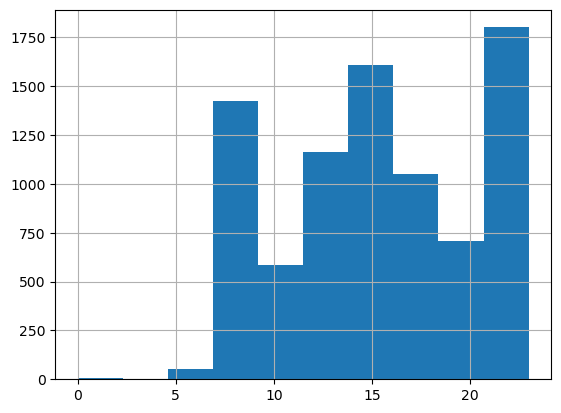

<Axes: >

dep_day


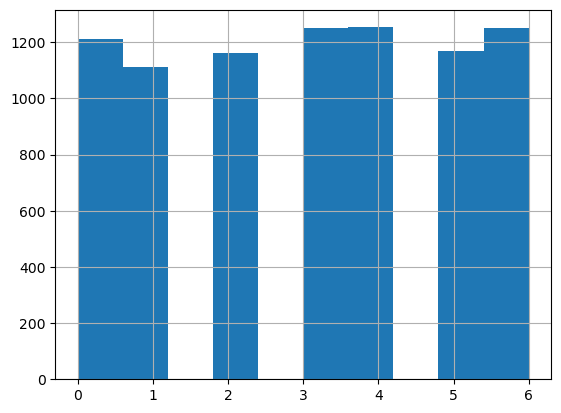

<Axes: >

Origin_Airport


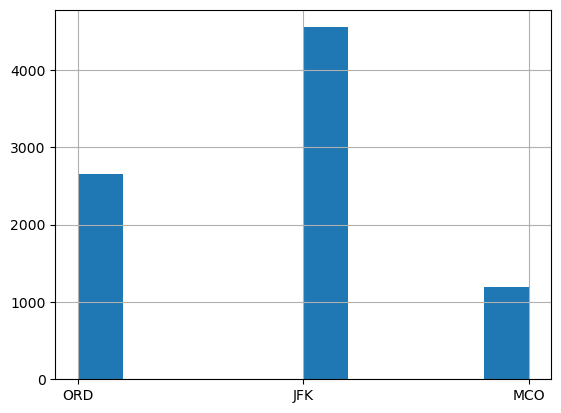

<Axes: >

arr_hour


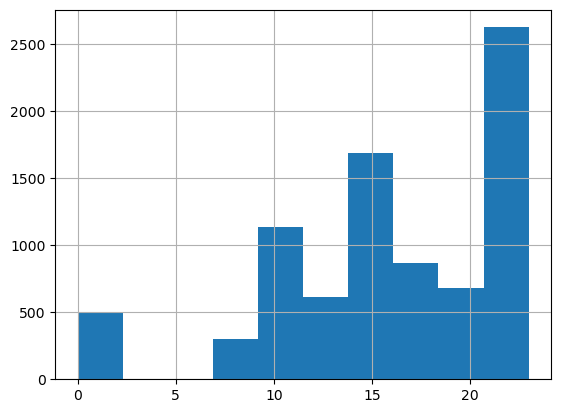

<Axes: >

arr_day


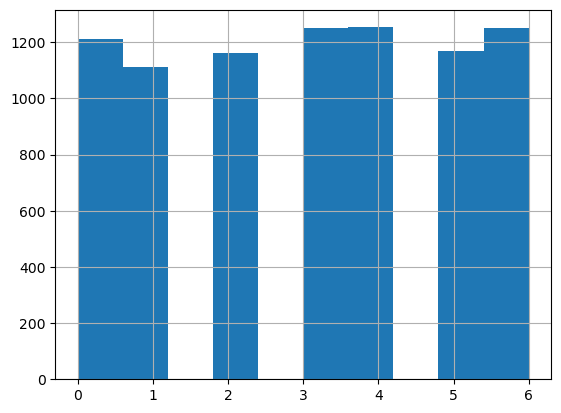

<Axes: >

dep_min


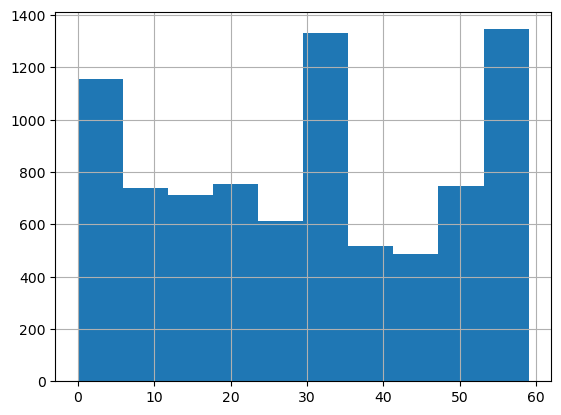

<Axes: >

arr_min


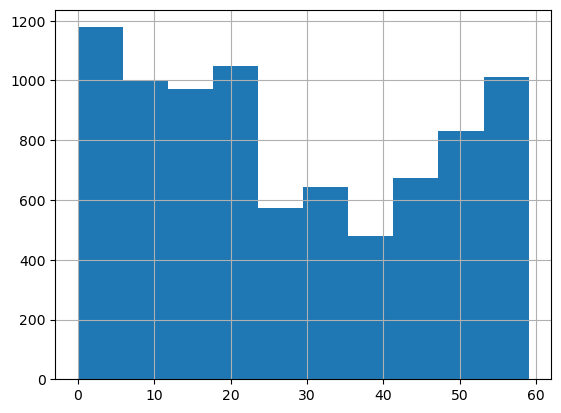

<Axes: >

arr_status


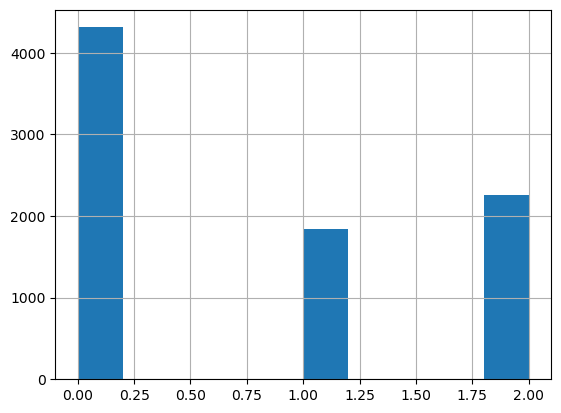

<Axes: >

dep_status


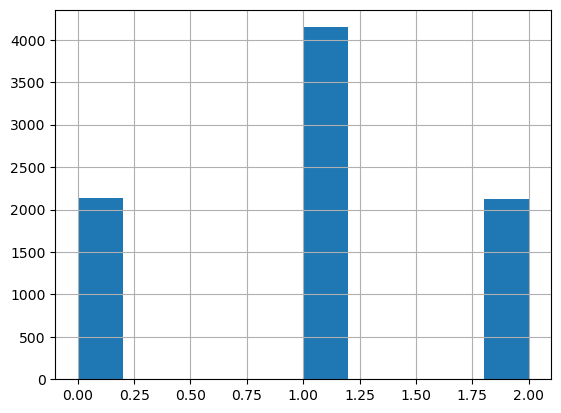

<Axes: >

dep_clouds


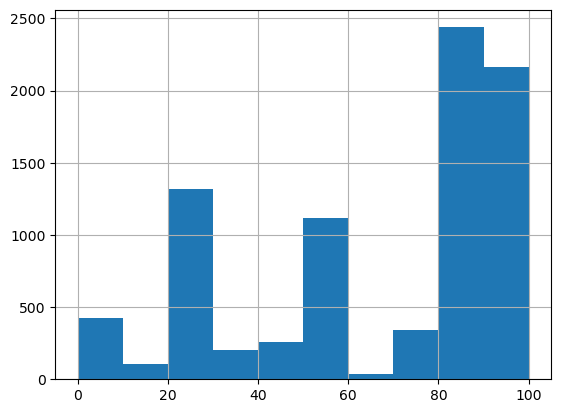

<Axes: >

dep_dewpt


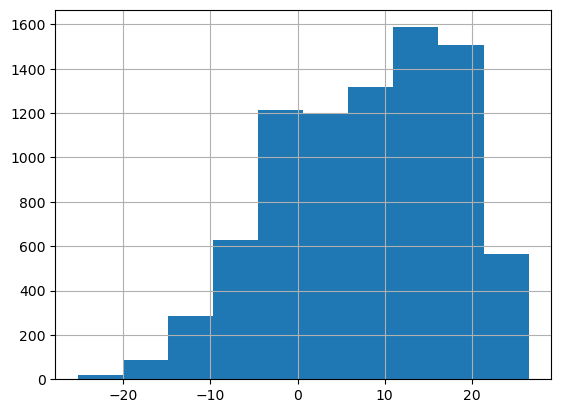

<Axes: >

dep_precip


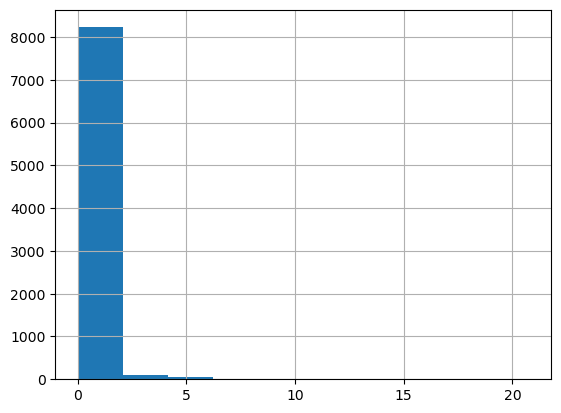

<Axes: >

dep_pres


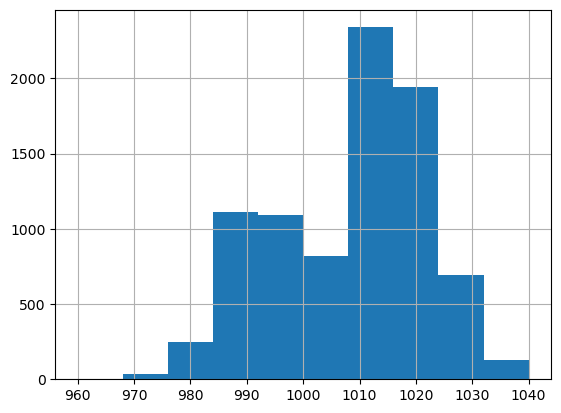

<Axes: >

dep_rh


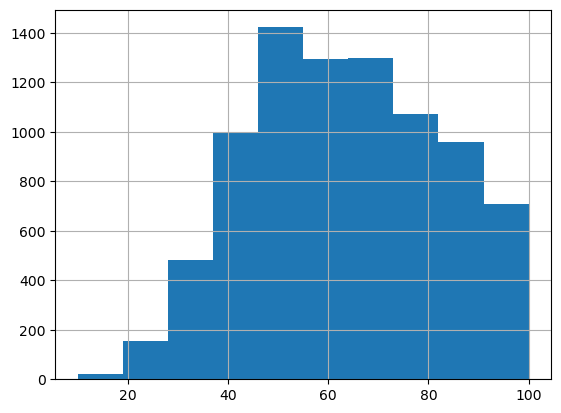

<Axes: >

dep_snow


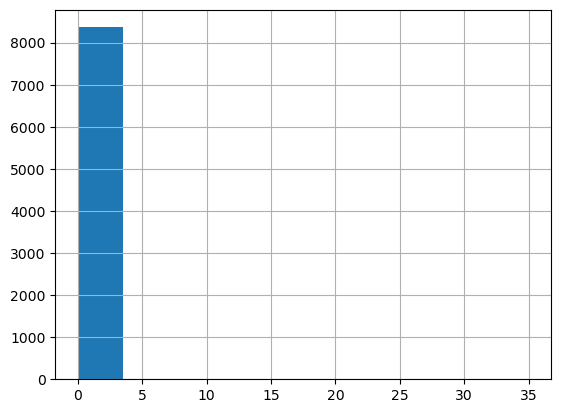

<Axes: >

dep_temp


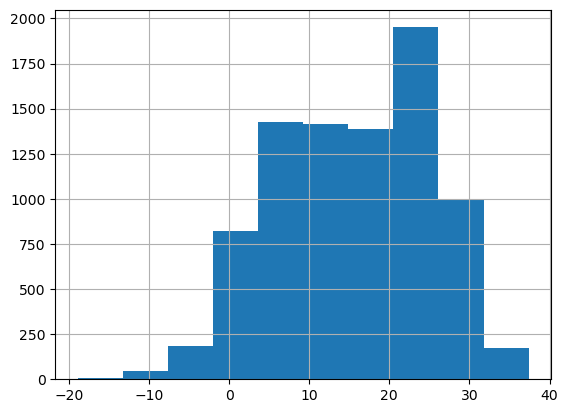

<Axes: >

dep_vis


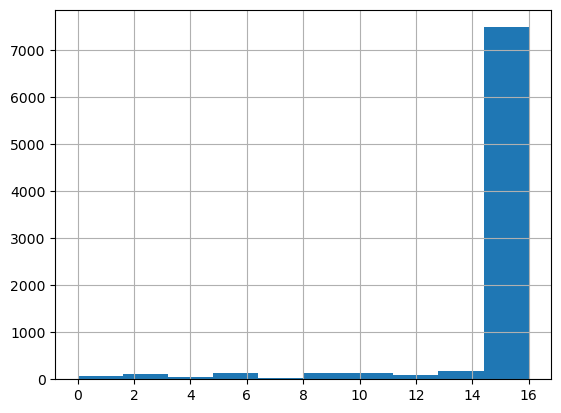

<Axes: >

dep_weather.code


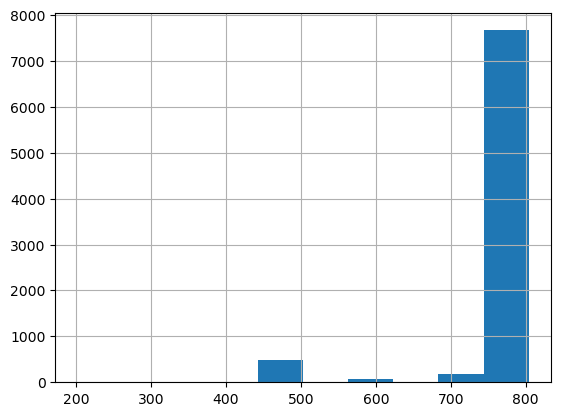

<Axes: >

dep_wind_dir


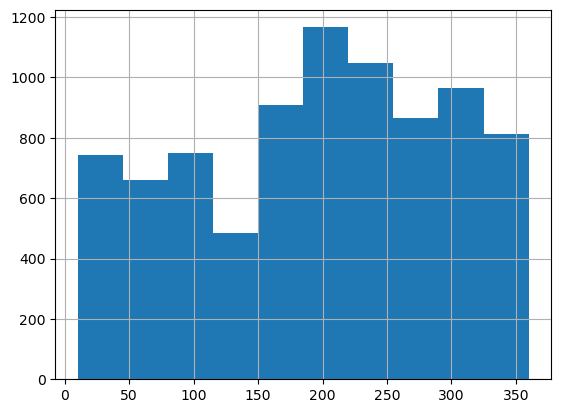

<Axes: >

dep_wind_gust_spd


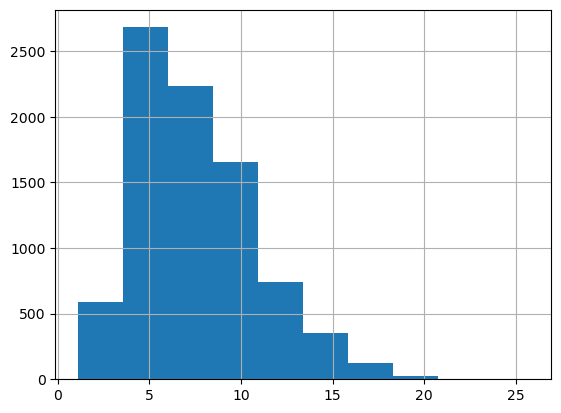

<Axes: >

dep_wind_spd


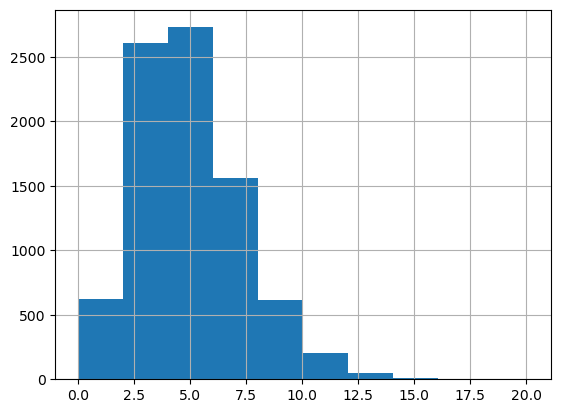

<Axes: >

arr_clouds


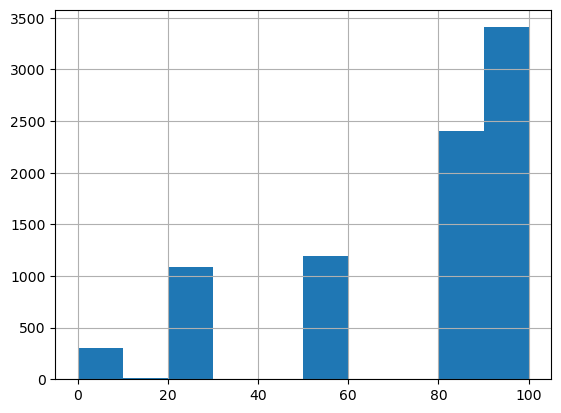

<Axes: >

arr_dewpt


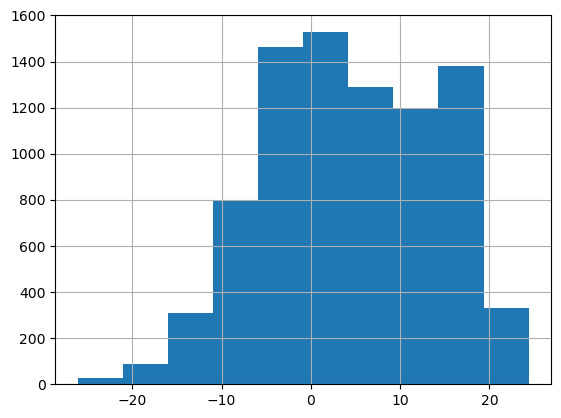

<Axes: >

arr_precip


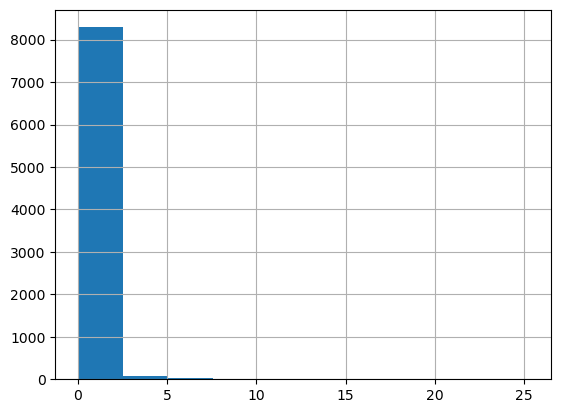

<Axes: >

arr_pres


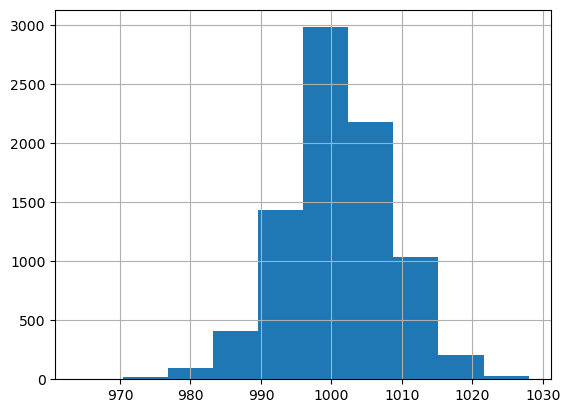

<Axes: >

arr_rh


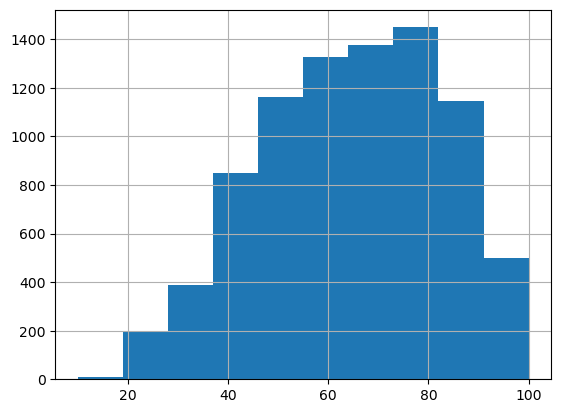

<Axes: >

arr_snow


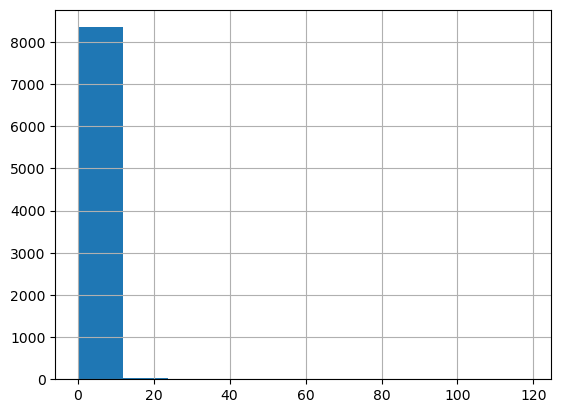

<Axes: >

arr_temp


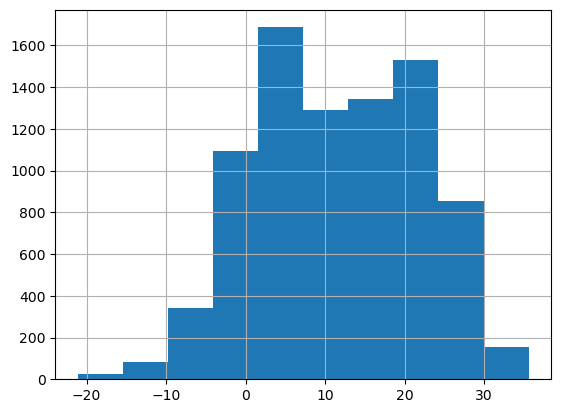

<Axes: >

arr_vis


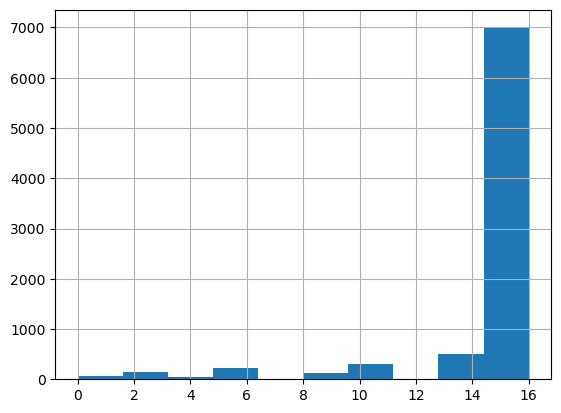

<Axes: >

arr_weather.code


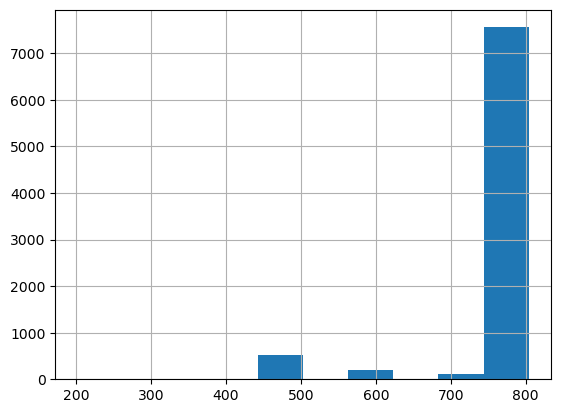

<Axes: >

arr_wind_dir


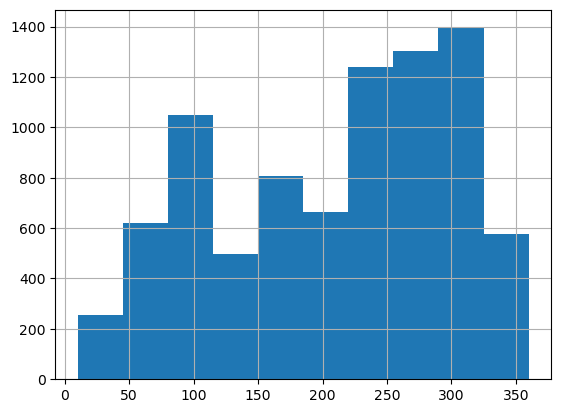

<Axes: >

arr_wind_gust_spd


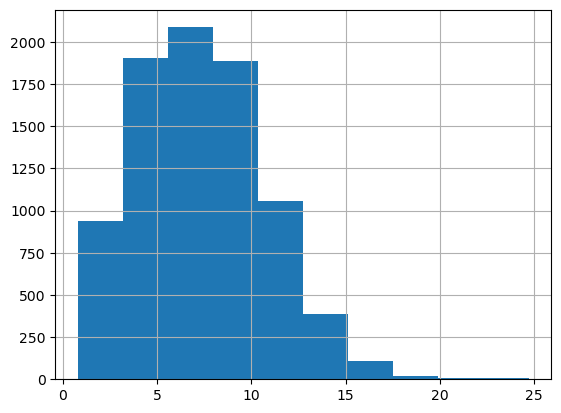

<Axes: >

arr_wind_spd


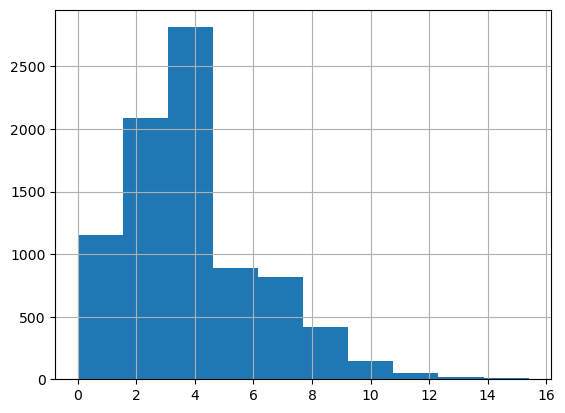

In [23]:
cols = sub_data.columns
print(cols)
for col in cols: 
    sub_data[col].hist()
    print(col)
    plt.show()

In [24]:
import plotly.express as px

In [25]:
sub_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [26]:
#for co in sub_data.columns:
fig = px.scatter(sub_data, y='arr_precip', x='arr_status', title='delay Over columns')
fig.show()

In [27]:
sub_data['dep_precip'] = sub_data['dep_precip']**2
sub_data['arr_precip'] = sub_data['arr_precip']**2

In [28]:
# correl = subset_data.corr()
correl = sub_data.corr(numeric_only=True)

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [29]:
#sub_data['Carrier_Code'].unique()

In [30]:
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "MQ", "AA", sub_data["Carrier_Code"])
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "9E", "DL", sub_data["Carrier_Code"])

In [31]:
su_data = sub_data
# su_data.head()
# sub_data.columns
su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
#su_data['dep_status']= pd.Categorical(su_data['dep_status'], categories = [0,1,2])
#su_data.drop(columns=['arr_h_angle','dep_h_angle'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [32]:
# su_data.drop(columns=['arr_status'],inplace = True)
# su_data.columns

In [33]:
su_data.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

In [34]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(su_data.drop(columns = ['arr_status']), su_data['arr_status'],stratify = su_data['arr_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train_m
X_test_m
y_train_m
y_test_m

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_status,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
4212,9,4,JFK,11,4,59,26,1,87,11.10,...,0.00,1005,43,0.00,20.60,16,804,170,13.60,5.70
3356,9,4,JFK,11,4,59,8,1,25,6.60,...,0.00,1010,72,0.00,15.00,16,804,270,6.40,3.60
7366,15,5,MCO,18,5,18,1,1,25,16.90,...,0.25,999,85,0.00,7.80,6,804,100,10.00,5.70
151,15,0,ORD,17,0,0,51,0,95,23.50,...,0.00,998,57,0.00,31.10,16,804,340,6.40,3.60
4874,16,3,JFK,17,3,5,26,1,100,17.70,...,2.25,991,89,0.00,12.20,11,500,90,6.80,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,12,5,JFK,13,5,30,45,0,43,-10.70,...,0.00,1013,46,0.00,-2.20,16,803,260,9.20,6.70
7727,16,5,MCO,19,5,17,0,0,25,-8.10,...,0.00,999,56,0.00,-13.90,16,802,320,7.60,2.10
301,20,0,ORD,23,0,55,38,1,40,20.70,...,0.00,1008,78,0.00,18.30,16,803,100,9.20,3.60
2076,18,1,ORD,21,1,18,9,2,87,4.00,...,0.00,1004,52,0.00,20.00,16,803,100,3.60,1.50


,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_status,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
5077,10,5,JFK,12,5,54,18,0,100,8.30,...,0.00,999,48,0.00,6.10,16,804,310,10.40,3.60
4929,9,0,JFK,11,0,59,14,0,100,12.10,...,0.00,1008,77,0.00,15.00,16,804,80,4.80,3.60
6164,21,2,JFK,23,2,55,7,0,59,-13.40,...,0.00,1009,64,0.00,-6.10,16,804,180,7.20,1.50
316,9,3,ORD,12,3,45,35,1,87,6.00,...,10.56,993,87,0.00,22.80,16,500,90,9.50,4.59
8344,11,3,MCO,14,3,30,10,2,50,16.40,...,0.00,996,73,0.00,8.90,16,804,270,13.40,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,18,5,ORD,20,5,0,51,2,0,-3.60,...,0.00,1000,33,0.00,12.80,16,802,110,4.59,4.59
6260,9,3,JFK,10,3,24,41,2,78,-5.40,...,0.00,1007,56,0.00,-5.60,16,804,300,11.10,6.70
6959,14,1,JFK,15,1,0,21,1,78,10.60,...,0.00,994,56,0.00,11.70,16,804,290,14.40,8.80
5651,21,2,JFK,22,2,37,52,2,78,20.50,...,0.00,1002,63,0.00,22.80,16,802,360,4.80,2.60


4212    1
3356    0
7366    1
151     0
4874    0
       ..
3785    0
7727    0
301     2
2076    2
7121    0
Name: arr_status, Length: 6724, dtype: int32

5077    1
4929    0
6164    0
316     2
8344    2
       ..
2045    0
6260    2
6959    0
5651    2
6051    0
Name: arr_status, Length: 1681, dtype: int32

In [35]:
# data to predict departure status
dep_data = X_train_m

In [36]:
# data to predict arrival status
arr_data = su_data.drop(columns = ['dep_status'])

In [37]:
dep_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

### Training to predict departure status

In [38]:
dep_data = pd.get_dummies(dep_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_data.head()
# su_data.dtypes
# su_data.columns

,dep_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4212,1,87,11.10,0.00,1027,76,0.00,15.30,16,155,...,False,False,False,False,False,False,False,False,True,False
3356,1,25,6.60,0.00,1024,58,0.00,14.80,16,330,...,False,False,False,False,False,False,False,False,True,False
7366,1,25,16.90,0.00,1013,40,0.00,32.20,16,180,...,False,False,False,False,False,False,False,False,True,False
151,0,95,23.50,16.00,985,62,0.00,31.70,16,185,...,False,False,False,False,False,False,False,False,True,False
4874,1,100,17.70,0.00,1008,90,0.00,19.40,16,140,...,False,False,False,False,False,False,False,False,False,False


In [39]:
X_train, X_test, y_train, y_test = train_test_split(dep_data.drop(columns = ['dep_status']), dep_data['dep_status'],stratify = dep_data['dep_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6821,87,6.00,0.00,1021,76,0.00,10.00,16,240,4.80,...,False,False,False,False,False,False,False,False,True,False
7158,31,-6.70,0.00,1025,56,0.00,1.10,16,310,9.80,...,False,False,False,False,False,False,False,False,True,False
5075,25,-5.30,0.00,1020,50,0.00,4.20,16,255,11.20,...,False,False,False,False,False,False,False,False,True,False
2011,87,-1.20,0.00,997,53,0.00,7.80,16,120,5.09,...,False,False,False,False,False,False,False,False,True,False
4259,78,12.30,0.00,1016,79,0.00,16.00,16,205,5.60,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,50,19.30,0.00,1014,48,0.00,31.70,16,110,8.40,...,False,False,False,False,False,False,False,False,True,False
1900,91,-12.80,0.00,1008,59,0.00,-6.10,16,30,6.00,...,False,False,False,False,False,False,False,False,True,False
2564,87,-6.90,0.00,1001,47,0.00,3.30,16,120,4.40,...,False,False,False,False,False,False,False,False,True,False
6729,25,16.00,0.00,1015,62,0.00,23.80,16,230,7.60,...,False,False,False,False,False,False,False,False,True,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4302,50,6.40,0.00,1015,37,0.00,21.70,16,200,5.37,...,False,False,False,False,False,False,False,True,False,False
2099,100,6.50,1.56,989,52,0.00,16.40,16,20,4.47,...,False,False,False,False,False,False,True,False,False,False
3025,100,5.60,0.00,1011,64,0.00,12.20,16,180,8.40,...,False,False,False,False,True,False,False,False,False,False
685,12,-0.60,0.00,984,74,0.00,3.60,16,225,10.80,...,False,False,False,False,False,False,False,False,True,False
2780,100,1.80,0.06,1023,67,0.00,7.50,16,95,9.60,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,0,10.50,0.00,1008,42,0.00,24.30,16,270,8.40,...,False,False,False,False,False,False,False,True,False,False
1993,87,-4.60,0.00,1002,23,0.00,16.60,16,175,4.80,...,False,False,False,False,False,False,False,True,False,False
2198,59,15.10,0.00,985,57,0.00,24.10,14,220,6.80,...,False,False,False,False,False,False,False,False,True,False
1866,0,-4.50,0.00,997,59,0.00,2.60,16,230,7.20,...,False,False,False,False,False,False,True,False,False,False


dtype('int32')

4302    1
2099    2
3025    0
685     1
2780    1
       ..
6712    0
1993    0
2198    1
1866    1
1395    1
Name: dep_status, Length: 1345, dtype: int32

In [40]:
# y = X_train['arr_status']
# u = X_test['arr_status']
# X_train.drop(columns=['arr_status'], inplace=True)
# X_test.drop(columns=['arr_status'], inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
6821,0.64,-0.17,-0.07,0.98,0.68,-0.06,-0.56,0.31,0.46,-0.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
7158,-1.17,-1.44,-0.07,1.28,-0.37,-0.06,-1.47,0.31,1.18,0.65,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
5075,-1.36,-1.30,-0.07,0.91,-0.69,-0.06,-1.15,0.31,0.62,1.07,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
2011,0.64,-0.89,-0.07,-0.81,-0.53,-0.06,-0.78,0.31,-0.77,-0.77,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
4259,0.35,0.46,-0.07,0.61,0.84,-0.06,0.06,0.31,0.10,-0.62,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.58,-0.40,-1.21,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,-0.56,1.15,-0.07,0.46,-0.79,-0.06,1.67,0.31,-0.87,0.23,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
1900,0.76,-2.04,-0.07,0.01,-0.21,-0.06,-2.21,0.31,-1.69,-0.50,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
2564,0.64,-1.46,-0.07,-0.51,-0.85,-0.06,-1.24,0.31,-0.77,-0.98,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
6729,-1.36,0.82,-0.07,0.54,-0.05,-0.06,0.86,0.31,0.36,-0.01,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4302,-0.56,-0.13,-0.07,0.54,-1.37,-0.06,0.65,0.31,0.05,-0.69,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.52,-1.21,0.00
2099,1.05,-0.12,0.07,-1.41,-0.58,-0.06,0.10,0.31,-1.79,-0.96,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.58,-0.40,-1.21,0.00
3025,1.05,-0.21,-0.07,0.24,0.05,-0.06,-0.33,0.31,-0.15,0.23,...,-0.09,0.00,-0.07,0.00,5.25,-0.03,-0.39,-0.40,-1.21,0.00
685,-1.78,-0.83,-0.07,-1.78,0.58,-0.06,-1.21,0.31,0.31,0.95,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
2780,1.05,-0.59,-0.07,1.13,0.21,-0.06,-0.81,0.31,-1.02,0.59,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,-2.17,0.28,-0.07,0.01,-1.11,-0.06,0.91,0.31,0.77,0.23,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.52,-1.21,0.00
1993,0.64,-1.23,-0.07,-0.44,-2.11,-0.06,0.12,0.31,-0.20,-0.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.52,-1.21,0.00
2198,-0.27,0.73,-0.07,-1.71,-0.32,-0.06,0.89,-0.40,0.26,-0.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
1866,-2.17,-1.22,-0.07,-0.81,-0.21,-0.06,-1.31,0.31,0.36,-0.13,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.58,-0.40,-1.21,0.00


6821    0
7158    2
5075    1
2011    0
4259    1
       ..
7553    2
1900    1
2564    1
6729    2
3459    0
Name: dep_status, Length: 5379, dtype: int32

4302    1
2099    2
3025    0
685     1
2780    1
       ..
6712    0
1993    0
2198    1
1866    1
1395    1
Name: dep_status, Length: 1345, dtype: int32

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'C': [0.0001,0.001,0.01,0.1,1.0,5.0],
        'penalty': ['l2','l1',None]
    }
dep_model = LogisticRegression(fit_intercept = True,solver='lbfgs', multi_class = 'ovr',max_iter = 1000)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dep_model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
best_model.score(X_test,y_test)
best_model.score(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\gurud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\gurud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\gurud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\gurud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\gurud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\gurud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\gurud\anaconda3\Lib\site-

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, multi_class='ovr'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0],
                         'penalty': ['l2', 'l1', None]},
             scoring='accuracy', verbose=1)

Best parameters: {'C': 0.0001, 'penalty': None}
Best score: 0.525560646667243


0.5078066914498142

0.5679494329801078

In [47]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
dep_model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = None, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

dep_model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
dep_model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
dep_model.coef_

# This is the coefficient Beta_0
dep_model.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr', penalty=None)

0.5679494329801078

array([[-8.32254075e-03,  2.44673947e-01, -2.22868125e-01,
         1.41182472e-01, -1.24082879e-01, -8.12359330e-02,
        -2.52640580e-01,  5.33349635e-03, -8.00269905e-02,
        -1.06345211e-01,  8.13385242e-02,  2.35842917e-01,
         2.34619665e-01, -7.67121070e-01, -1.03807105e-01,
        -1.46769311e-01,  6.25285902e-02, -2.85720769e-01,
         8.79449575e-02,  1.68576283e-02, -5.87577792e-02,
         1.34259519e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.25092008e+00, -1.63694594e+00, -3.31285995e+00,
        -3.67065413e+00, -1.75228672e+00, -1.69294810e+00,
        -1.03319030e+00, -1.13059085e+00, -4.10083830e-01,
        -1.29722667e-01,  3.17930632e-01,  3.72396081e-01,
         1.58971308e+00,  1.52016606e+00,  1.58754442e+00,
         3.31840992e+00,  3.64543582e+00,  4.15039962e-01,
         7.35051460e-02,  5.99379946e-02,  4.94532134e-02,
        -1.18870942e-02,  6.89968389e-03,  2.77531965e-0

array([-1.47985997e+00,  7.90154506e-04, -1.49381268e+00])

In [49]:
dep_model.score(X_test,y_test)


0.5078066914498142

In [50]:
dep_model_output = pd.DataFrame(dep_model.predict(X_test), index = X_test.index, columns = ['pred_dep_status'])
dep_model_output = dep_model_output.merge(y_test, left_index = True, right_index = True)
dep_model_output.head(20)

,pred_dep_status,dep_status
4302,1,1
2099,2,2
3025,1,0
685,1,1
2780,0,1
4429,1,0
408,1,1
7790,2,1
7399,2,1
2276,1,1


In [51]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
dep_clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

dep_clf = dep_clf.fit(X_train, y_train) 
dep_clf.score(X_train, y_train)

dep_clf.feature_importances_
dep_clf_output = pd.DataFrame(dep_clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
dep_clf_output = dep_clf_output.merge(y_test, left_index = True, right_index = True)
dep_clf_output.head(20)
dep_clf.score(X_test, y_test)

0.866517940137572

array([0.01549523, 0.04953887, 0.0078758 , 0.06564389, 0.05878518,
       0.        , 0.04877336, 0.00670209, 0.05283842, 0.04484688,
       0.05999918, 0.00965384, 0.0433023 , 0.00687593, 0.04065004,
       0.06399407, 0.        , 0.0521129 , 0.00815393, 0.0572437 ,
       0.05022217, 0.03168406, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00145654, 0.00119021, 0.        ,
       0.00220016, 0.0027349 , 0.00140509, 0.        , 0.0029907 ,
       0.00236717, 0.00338814, 0.00333168, 0.        , 0.00123403,
       0.00454825, 0.        , 0.01014559, 0.0037807 , 0.        ,
       0.00155723, 0.00293005, 0.00349302, 0.00150761, 0.00274093,
       0.00455532, 0.        , 0.01059081, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00229614, 0.00166456, 0.        , 0.00097728,
       0.        , 0.00523596, 0.        , 0.00061615, 0.        ,
       0.        , 0.0021614 , 0.00237345, 0.00156383, 0.     

,pred_arr_status,dep_status
4302,0,1
2099,1,2
3025,0,0
685,1,1
2780,0,1
4429,0,0
408,1,1
7790,1,1
7399,2,1
2276,1,1


0.420817843866171

0.6982710540992749

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_pres            0.06
dep_dewpt           0.05
dep_temp            0.05
arr_temp            0.05
arr_dewpt           0.05
arr_rh              0.04
dep_rh              0.04
dep_wind_dir        0.04
dep_wind_gust_spd   0.04
arr_wind_gust_spd   0.04
dep_wind_spd        0.04
arr_pres            0.04
dtype: float64

,pred_Y
4302,1
2099,1
3025,1
685,1
2780,1


,pred_Y,dep_status
4302,1,1
2099,1,2
3025,1,0
685,1,1
2780,1,1


Fraction of correct classification 


0.5018587360594795

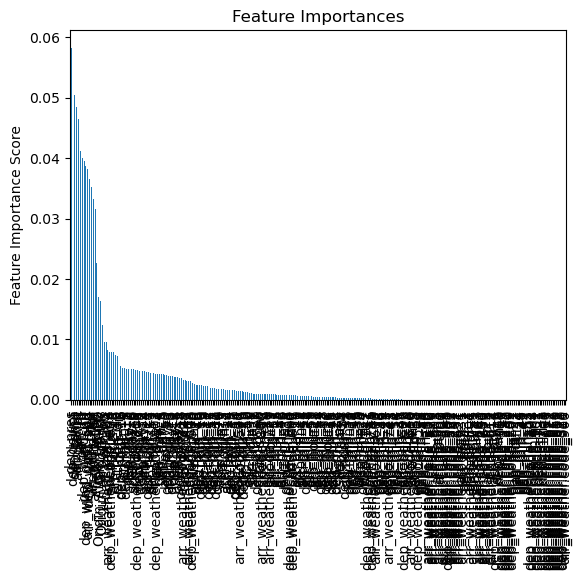

<Figure size 2000x1000 with 0 Axes>

In [52]:
dep_rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

dep_rf = dep_rf.fit(X_train, y_train) 
dep_rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(dep_rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

dep_rf_output = pd.DataFrame(dep_rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

dep_rf_output.head()
dep_rf_output = dep_rf_output.merge(y_test, left_index = True, right_index = True)
dep_rf_output.head()
print('Fraction of correct classification ')
dep_rf.score(X_test, y_test) 

In [53]:
dep_gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

dep_gb = dep_gb.fit(X_train, y_train) 
dep_gb.score(X_train, y_train) 

0.8456962260643243

In [54]:
# linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
# linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
# linear_reg_output.head(20)
dep_gb.score(X_test,y_test)

0.4929368029739777

### Training to predict arrival status

In [55]:
arr_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [56]:
X_train_m.columns
arr_data = X_train_m.merge(y_train_m, left_index = True, right_index = True)
arr_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'arr_status'],
      dtype='object')

In [57]:
arr_data.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
arr_status              int32
dtype: obj

In [58]:
arr_data['dep_status']= pd.Categorical(arr_data['dep_status'], categories = [0,1,2])

In [59]:
arr_data.dtypes
arr_data.columns

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
arr_status              int32
dtype: obj

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'arr_status'],
      dtype='object')

In [60]:
arr_data = pd.get_dummies(arr_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
arr_data.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4212,87,11.10,0.00,1027,76,0.00,15.30,16,155,10.00,...,False,False,False,False,False,False,False,False,True,False
3356,25,6.60,0.00,1024,58,0.00,14.80,16,330,6.00,...,False,False,False,False,False,False,False,False,True,False
7366,25,16.90,0.00,1013,40,0.00,32.20,16,180,8.80,...,False,False,False,False,False,False,False,False,True,False
151,95,23.50,16.00,985,62,0.00,31.70,16,185,19.50,...,False,False,False,False,False,False,False,False,True,False
4874,100,17.70,0.00,1008,90,0.00,19.40,16,140,10.00,...,False,False,False,False,False,False,False,False,False,False


In [61]:
X_train, X_test, y_train, y_test = train_test_split(arr_data.drop(columns = ['arr_status']), arr_data['arr_status'],stratify = arr_data['arr_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4485,87,22.10,0.00,1012,82,0.00,25.40,16,175,2.00,...,False,False,False,False,False,False,False,True,False,False
1470,25,-9.10,0.00,1012,67,0.00,-3.90,16,250,2.80,...,False,False,False,False,False,False,False,True,False,False
3820,59,8.70,0.00,1003,77,0.00,12.70,16,190,12.80,...,False,False,False,False,False,False,False,False,True,False
1670,87,19.10,0.00,986,73,0.00,24.30,16,50,6.80,...,False,False,False,False,False,False,False,False,True,False
5226,100,2.80,4.00,1018,89,0.00,4.40,11,60,12.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,100,4.30,5.06,1005,95,0.00,5.00,8,20,8.40,...,False,False,False,False,False,False,False,False,False,False
6347,25,3.20,0.00,1019,60,0.00,10.60,16,165,12.80,...,False,False,False,False,False,False,True,False,False,False
7364,87,21.10,0.00,1016,65,0.00,28.30,16,120,6.80,...,False,False,False,False,False,False,False,False,True,False
3731,100,-4.50,0.00,1013,43,0.00,7.20,16,40,3.20,...,False,False,False,False,False,False,False,False,True,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5310,50,-6.80,0.00,1014,49,0.00,2.80,16,320,10.40,...,False,False,False,False,False,False,False,False,False,False
3444,100,13.60,45.56,995,93,0.00,14.80,9,275,15.00,...,False,False,False,False,False,False,False,False,False,False
1755,87,17.20,0.00,992,87,0.00,19.40,16,120,4.80,...,False,False,False,False,True,False,False,False,False,False
5740,50,21.70,0.00,1018,78,0.00,25.90,13,135,2.80,...,False,False,False,False,False,False,False,False,True,False
6990,59,1.60,0.00,1020,65,0.00,7.80,16,230,6.00,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,59,16.90,0.00,1011,69,0.00,22.90,16,25,5.60,...,False,False,False,False,False,False,False,False,True,False
6882,87,3.50,0.00,1002,44,0.00,15.70,16,295,13.90,...,False,False,False,False,False,False,False,False,False,False
4928,100,16.10,1.00,1019,96,0.00,16.70,11,50,5.20,...,False,False,False,False,False,False,False,False,True,False
348,87,6.50,0.25,978,46,0.00,18.30,16,290,17.00,...,False,False,False,False,False,False,False,False,True,False


dtype('int32')

5310    0
3444    0
1755    2
5740    0
6990    0
       ..
5692    0
6882    1
4928    2
348     0
7145    2
Name: arr_status, Length: 1345, dtype: int32

In [62]:
X_test_o = X_test
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train = pd.DataFrame(sc2.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc2.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4485,0.64,1.43,-0.08,0.32,1.01,-0.06,1.02,0.31,-0.20,-1.72,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.50,-1.20,0.00
1470,-1.35,-1.69,-0.08,0.32,0.22,-0.06,-2.01,0.31,0.57,-1.47,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.50,-1.20,0.00
3820,-0.26,0.09,-0.08,-0.35,0.75,-0.06,-0.29,0.31,-0.04,1.58,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
1670,0.64,1.13,-0.08,-1.62,0.54,-0.06,0.91,0.31,-1.48,-0.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
5226,1.05,-0.50,0.28,0.76,1.38,-0.06,-1.15,-1.46,-1.37,1.34,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,1.05,-0.35,0.38,-0.21,1.70,-0.06,-1.09,-2.52,-1.78,0.24,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.20,0.00
6347,-1.35,-0.46,-0.08,0.84,-0.15,-0.06,-0.51,0.31,-0.30,1.58,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.56,-0.40,-1.20,0.00
7364,0.64,1.33,-0.08,0.61,0.11,-0.06,1.32,0.31,-0.76,-0.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
3731,1.05,-1.23,-0.08,0.39,-1.05,-0.06,-0.86,0.31,-1.58,-1.35,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5310,-0.55,-1.46,-0.08,0.47,-0.73,-0.06,-1.32,0.31,1.29,0.85,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.20,0.00
3444,1.05,0.58,4.00,-0.95,1.60,-0.06,-0.08,-2.17,0.83,2.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.20,0.00
1755,0.64,0.94,-0.08,-1.18,1.28,-0.06,0.40,0.31,-0.76,-0.86,...,-0.09,0.00,-0.07,0.00,5.18,-0.03,-0.39,-0.40,-1.20,0.00
5740,-0.55,1.39,-0.08,0.76,0.80,-0.06,1.07,-0.75,-0.61,-1.47,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
6990,-0.26,-0.62,-0.08,0.91,0.11,-0.06,-0.80,0.31,0.37,-0.50,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.56,-0.40,-1.20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,-0.26,0.91,-0.08,0.24,0.32,-0.06,0.76,0.31,-1.73,-0.62,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
6882,0.64,-0.43,-0.08,-0.43,-1.00,-0.06,0.02,0.31,1.03,1.92,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.20,0.00
4928,1.05,0.83,0.01,0.84,1.75,-0.06,0.12,-1.46,-1.48,-0.74,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
348,0.64,-0.13,-0.05,-2.22,-0.89,-0.06,0.29,0.31,0.98,2.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00


4485    1
1470    0
3820    2
1670    2
5226    1
       ..
3854    2
6347    1
7364    0
3731    0
6547    2
Name: arr_status, Length: 5379, dtype: int32

5310    0
3444    0
1755    2
5740    0
6990    0
       ..
5692    0
6882    1
4928    2
348     0
7145    2
Name: arr_status, Length: 1345, dtype: int32

In [63]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
arr_model2 = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

arr_model2.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
arr_model2.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
arr_model2.coef_

# This is the coefficient Beta_0
arr_model2.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.7443762781186094

array([[-1.38998594e-02,  5.12917763e-01, -7.82024196e-01,
        -2.87830706e-02, -2.24872891e-01, -6.80816392e-01,
        -5.01745561e-01,  1.32674665e-01,  3.10838697e-02,
        -2.41074141e-01,  1.12827108e-01,  1.07363398e-01,
        -3.58997987e-01, -2.47469105e-01,  2.96974035e-02,
        -8.21158837e-03,  4.84338603e-02,  3.22071440e-01,
         7.66895046e-02, -6.90817239e-02, -1.89366678e-02,
        -3.46797296e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.36873125e-01,  3.60916864e-01,  3.20424287e-01,
         2.88817311e-01,  1.24250550e-01,  1.18430510e-01,
         2.27793584e-01,  1.49864312e-01,  1.09547967e-01,
        -1.01571660e-01,  4.79863803e-02,  2.38483086e-02,
        -2.51760185e-01, -6.44364993e-02, -1.08497227e-01,
        -1.48171350e-01, -6.53935200e-01, -3.27423824e-01,
         4.92744563e-03,  3.20143762e-02, -1.93431390e-02,
        -9.08842854e-03,  9.60374646e-03, -1.42027726e-0

array([-0.22296673, -1.55807817, -1.71465731])

In [64]:
arr_model2.score(X_test,y_test)


0.704089219330855

In [65]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
arr_clf2 = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

arr_clf2 = arr_clf2.fit(X_train, y_train) 
arr_clf2.score(X_train, y_train)

arr_clf2.feature_importances_
arr_clf2_output = pd.DataFrame(arr_clf2.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
arr_clf2_output = arr_clf2_output.merge(y_test, left_index = True, right_index = True)
arr_clf2_output.head(20)
arr_clf2.score(X_test, y_test)

0.9025841234430192

array([1.23072702e-02, 3.99400998e-02, 7.45117515e-03, 3.24211155e-02,
       3.00339322e-02, 0.00000000e+00, 3.37066893e-02, 2.25075263e-03,
       3.29208461e-02, 2.57882964e-02, 2.99659816e-02, 5.86941979e-03,
       2.21231398e-02, 4.82504859e-03, 2.36713681e-02, 4.27764785e-02,
       1.18867785e-03, 2.29499105e-02, 6.35056941e-03, 2.39315745e-02,
       3.72642849e-02, 1.99851119e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.31199650e-03, 9.88358397e-04, 9.11100838e-04,
       1.52283544e-03, 3.79051437e-04, 4.65121813e-03, 1.99978639e-04,
       2.33138855e-03, 0.00000000e+00, 0.00000000e+00, 3.77379045e-04,
       0.00000000e+00, 1.57787051e-03, 5.03172061e-04, 2.00198097e-03,
       0.00000000e+00, 7.25284042e-04, 1.23091933e-03, 1.26283651e-03,
       2.69556461e-04, 3.51734716e-04, 6.85571933e-04, 5.86789020e-03,
       2.77099362e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

,pred_arr_status,arr_status
5310,0,0
3444,2,0
1755,1,2
5740,0,0
6990,0,0
1888,1,2
1611,0,0
5034,0,0
2872,0,0
2475,0,0


0.6096654275092936

0.7620375534485964

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_status_2        0.34
dep_status_1        0.07
dep_temp            0.03
dep_dewpt           0.03
arr_rh              0.03
dep_rh              0.03
arr_dewpt           0.03
dep_pres            0.03
arr_temp            0.03
dep_wind_gust_spd   0.02
dep_wind_spd        0.02
dep_wind_dir        0.02
dtype: float64

,pred_Y
5310,0
3444,0
1755,2
5740,0
6990,0


,pred_Y,arr_status
5310,0,0
3444,0,0
1755,2,2
5740,0,0
6990,0,0


Fraction of correct classification 


0.6988847583643123

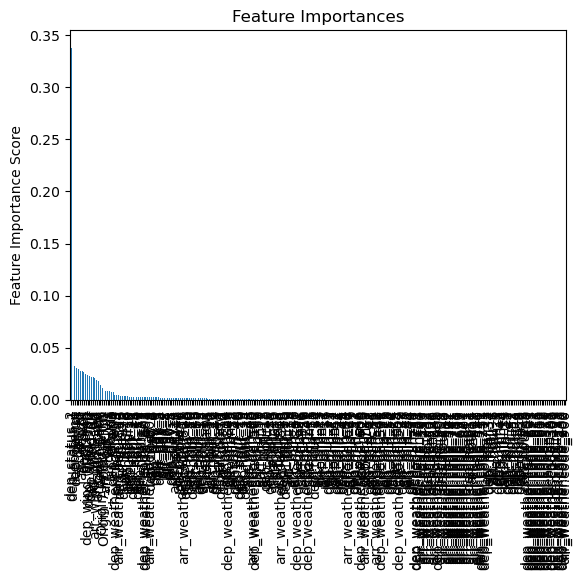

<Figure size 2000x1000 with 0 Axes>

In [66]:
arr_rf2 = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

arr_rf2 = arr_rf2.fit(X_train, y_train) 
arr_rf2.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(arr_rf2.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

arr_rf2_output = pd.DataFrame(arr_rf2.predict(X_test), index = X_test.index, columns = ['pred_Y'])

arr_rf2_output.head()
arr_rf2_output = arr_rf2_output.merge(y_test, left_index = True, right_index = True)
arr_rf2_output.head()
print('Fraction of correct classification ')
arr_rf2.score(X_test, y_test) 

In [67]:
arr_gb2 = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

arr_gb2 = arr_gb2.fit(X_train, y_train) 
arr_gb2.score(X_train, y_train) 

0.8938464398587098

In [68]:
# linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
# linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
# linear_reg_output.head(20)
arr_gb2.score(X_test,y_test)

0.6981412639405205

In [69]:
X_test_o = X_test_m.drop(columns = ['dep_status'])
X_test_o = pd.get_dummies(X_test_o, drop_first = True)
X_test_o_1 = pd.DataFrame(sc.transform(X_test_o), columns = X_test_o.columns, index = X_test_o.index)
X_test_o_1.head()

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5077,1.05,0.06,-0.07,-0.14,0.74,-0.06,-0.33,0.31,1.59,1.38,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
4929,1.05,0.44,-0.07,0.98,1.58,-0.06,-0.22,-3.59,-1.64,0.23,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
6164,-0.27,-2.10,-0.07,1.28,-1.43,-0.06,-1.59,0.31,1.38,-0.63,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00
316,0.64,-0.17,-0.07,-1.33,0.21,-0.06,-0.35,0.31,1.33,1.13,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.21,0.00
8344,-0.56,0.86,-0.07,0.61,-0.69,-0.06,1.27,0.31,-1.38,-0.98,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.83,0.00


In [70]:
dep_model_output = pd.DataFrame(dep_model.predict(X_test_o_1), index = X_test_o_1.index, columns = ['dep_status'])
dep_model_output = dep_model_output.merge(X_test_o, left_index = True, right_index = True)
dep_model_output.head(20)

,dep_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5077,1,100,8.30,0.00,1006,77,0.00,12.20,16,350,...,False,False,False,False,False,False,False,False,True,False
4929,1,100,12.10,0.00,1021,93,0.00,13.30,5,35,...,False,False,False,False,False,False,False,False,True,False
6164,0,59,-13.40,0.00,1025,36,0.00,-0.10,16,330,...,False,False,False,False,False,False,False,False,True,False
316,1,87,6.00,0.00,990,67,0.00,12.00,16,325,...,False,False,False,False,False,False,False,False,False,False
8344,1,50,16.40,0.00,1016,50,0.00,27.80,16,60,...,False,False,False,False,False,False,False,False,True,False
1790,1,87,-2.30,0.00,988,72,0.00,2.20,16,310,...,False,False,False,False,False,False,False,False,True,False
4682,1,50,21.40,0.00,1008,52,0.00,32.50,16,180,...,False,False,False,False,False,False,False,True,False,False
2043,1,100,4.20,0.00,984,63,0.00,11.00,16,35,...,False,False,False,False,False,False,False,False,True,False
2633,1,0,-14.00,0.00,1000,69,0.00,-9.40,16,265,...,False,False,False,False,False,False,False,False,True,False
4492,1,95,21.50,0.00,1012,76,0.00,26.10,16,90,...,False,False,False,False,False,False,False,False,True,False


In [71]:
dep_model_output['dep_status']= pd.Categorical(dep_model_output['dep_status'], categories = [0,1,2])

In [72]:
dep_model_output = pd.get_dummies(dep_model_output, columns=['dep_status'],drop_first = True)

In [73]:
dep_model_output = dep_model_output[X_test.columns]
dep_model_output.head()

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5077,100,8.30,0.00,1006,77,0.00,12.20,16,350,12.20,...,False,False,False,False,False,False,False,False,True,False
4929,100,12.10,0.00,1021,93,0.00,13.30,5,35,8.40,...,False,False,False,False,False,False,False,False,True,False
6164,59,-13.40,0.00,1025,36,0.00,-0.10,16,330,5.55,...,False,False,False,False,False,False,False,False,True,False
316,87,6.00,0.00,990,67,0.00,12.00,16,325,11.40,...,False,False,False,False,False,False,False,False,False,False
8344,50,16.40,0.00,1016,50,0.00,27.80,16,60,4.40,...,False,False,False,False,False,False,False,False,True,False


In [74]:
# dep_model_output = dep_model_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
#        'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
#        'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
#        'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
#        'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
#        'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
#        'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd']]
# dep_model_output.dtypes

In [75]:

dep_model_output = pd.DataFrame(sc2.transform(dep_model_output), columns = dep_model_output.columns, index = dep_model_output.index)

In [76]:
arr_model2.score(dep_model_output,y_test_m)

0.5353955978584176

In [77]:
pred_data1 = pd.read_csv('pred_data1.csv')
pred_data1.head()
pred_data1.dtypes

,Unnamed: 0,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,0,18,4,ORD,21,4,52,47,69,8.00,...,0.00,996.50,35,0,12.70,24.00,801,280,12.50,8.40
1,2,13,4,JFK,14,4,34,51,84,7.20,...,0.00,"1,019.50",58,0,12.10,24.00,804,110,7.20,5.20
2,4,11,4,MCO,14,4,35,20,84,7.20,...,0.00,"1,015.00",58,0,28.10,24.00,801,280,2.40,2.00
3,6,18,5,ORD,21,5,52,47,23,-2.40,...,0.00,994.00,40,0,9.70,24.13,803,296,6.66,4.40
4,8,13,5,JFK,14,5,25,41,71,-1.20,...,0.00,"1,014.50",46,0,15.80,24.00,803,283,5.73,4.13


Unnamed: 0             int64
dep_hour               int64
dep_day                int64
Origin_Airport        object
arr_hour               int64
arr_day                int64
dep_min                int64
arr_min                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [78]:

pred_data1['dep_min'] = pred_data1['dep_min'].astype('object')
pred_data1['arr_min'] = pred_data1['arr_min'].astype('object')
pred_data1['dep_hour'] = pred_data1['dep_hour'].astype('object')
pred_data1['dep_day'] = pred_data1['dep_day'].astype('object')
pred_data1['arr_hour'] = pred_data1['arr_hour'].astype('object')
pred_data1['arr_day'] = pred_data1['arr_day'].astype('object')
pred_data1['dep_weather.code'] = pred_data1['dep_weather.code'].astype('object')
pred_data1['arr_weather.code'] = pred_data1['arr_weather.code'].astype('object')
pred_data1.drop(columns=['Unnamed: 0'],inplace=True)
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd']]

pred_data1.dtypes

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code      object
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code      object
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [79]:
pred_data1['dep_hour'] = pd.Categorical(pred_data1['dep_hour'], categories=[i for i in range(24)])
pred_data1['dep_day'] = pd.Categorical(pred_data1['dep_day'], categories=[i for i in range(7)])
pred_data1['dep_min'] = pd.Categorical(pred_data1['dep_min'], categories=[i for i in range(60)])
pred_data1['arr_hour'] = pd.Categorical(pred_data1['arr_hour'], categories=[i for i in range(24)])
pred_data1['arr_day'] = pd.Categorical(pred_data1['arr_day'], categories=[i for i in range(7)])
pred_data1['arr_min'] = pd.Categorical(pred_data1['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
pred_data1['Origin_Airport'] = pd.Categorical(pred_data1['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
pred_data1['arr_weather.code'] = pd.Categorical(pred_data1['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
pred_data1['dep_weather.code'] = pd.Categorical(pred_data1['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])



In [80]:
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd']]

In [81]:
pred_data1.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt', 'dep_precip',
       'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [82]:
pred_data = pred_data1

In [83]:
pred_data1 = pd.get_dummies(pred_data1, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
pred_data1.head()
pred_data1.dtypes
pred_data1.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,19,-2.40,0.00,996.50,35,0,12.70,24.00,280,12.50,...,False,False,False,False,False,False,False,True,False,False
1,82,4.10,0.00,"1,019.50",58,0,12.10,24.00,110,7.20,...,False,False,False,False,False,False,False,False,True,False
2,14,19.10,0.00,"1,015.00",58,0,28.10,24.00,280,2.40,...,False,False,False,False,False,False,False,False,True,False
3,68,-3.20,0.00,994.00,40,0,9.70,24.13,296,6.66,...,False,False,False,False,False,False,True,False,False,False
4,66,4.30,0.00,"1,014.50",46,0,15.80,24.00,283,5.73,...,False,False,False,False,False,False,False,False,True,False


dep_clouds                int64
dep_dewpt               float64
dep_precip              float64
dep_pres                float64
dep_rh                    int64
                         ...   
arr_weather.code_801       bool
arr_weather.code_802       bool
arr_weather.code_803       bool
arr_weather.code_804       bool
arr_weather.code_900       bool
Length: 270, dtype: object

Index(['dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_wind_dir', 'dep_wind_gust_spd',
       ...
       'arr_weather.code_721', 'arr_weather.code_731', 'arr_weather.code_741',
       'arr_weather.code_751', 'arr_weather.code_800', 'arr_weather.code_801',
       'arr_weather.code_802', 'arr_weather.code_803', 'arr_weather.code_804',
       'arr_weather.code_900'],
      dtype='object', length=270)

In [84]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_test = pd.DataFrame(sc.transform(pred_data1), columns = pred_data1.columns, index = pred_data1.index)


In [85]:
dep_model_output = pd.DataFrame(dep_model.predict(X_test), index = X_test.index, columns = ['dep_status'])
dep_model_output = dep_model_output.merge(pred_data, left_index = True, right_index = True)
dep_model_output.head(30)

,dep_status,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,1,18,4,ORD,21,4,52,47,19,-2.40,...,0.50,999.00,73,0,12.70,19.20,803,260,8.30,5.60
1,2,13,4,JFK,14,4,34,51,82,4.10,...,0.50,996.50,55,0,16.30,22.00,804,160,13.70,9.20
2,2,11,4,MCO,14,4,35,20,14,19.10,...,0.50,996.50,55,0,16.30,22.00,804,160,13.70,9.20
3,1,18,5,ORD,21,5,52,47,68,-3.20,...,0.00,998.50,53,0,6.50,24.13,802,276,8.53,5.86
4,2,13,5,JFK,14,5,25,41,66,4.30,...,0.00,"1,000.50",44,0,10.50,20.40,804,290,11.20,8.00
5,1,13,5,MCO,16,5,35,25,2,16.30,...,0.00,996.50,45,0,9.70,21.30,803,283,10.93,7.73
6,1,18,6,ORD,21,6,52,47,3,-1.40,...,0.00,996.50,46,0,8.00,24.13,801,256,12.83,8.66
7,2,13,6,JFK,14,6,35,51,64,-1.10,...,0.00,997.50,38,0,10.60,24.13,803,270,12.30,8.40
8,1,11,6,MCO,13,6,5,50,37,18.80,...,0.00,998.00,41,0,9.80,24.13,803,270,11.80,8.00
9,1,18,0,ORD,21,0,52,47,75,1.00,...,0.00,"1,003.00",43,0,7.00,24.13,801,270,6.54,4.45


In [86]:
dep_model_output['dep_status']= pd.Categorical(dep_model_output['dep_status'], categories = [0,1,2])

In [87]:
dep_model_output = dep_model_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd']]
dep_model_output.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres              float64
dep_rh                  int64
dep_snow                int64
dep_temp              float64
dep_vis               float64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres              float64
arr_rh                  int64
arr_snow                int64
arr_temp              float64
arr_vis               float64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: object

In [88]:
dep_model_output = pd.get_dummies(dep_model_output, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_model_output.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,19,-2.40,0.00,996.50,35,0,12.70,24.00,280,12.50,...,False,False,False,False,False,False,False,True,False,False
1,82,4.10,0.00,"1,019.50",58,0,12.10,24.00,110,7.20,...,False,False,False,False,False,False,False,False,True,False
2,14,19.10,0.00,"1,015.00",58,0,28.10,24.00,280,2.40,...,False,False,False,False,False,False,False,False,True,False
3,68,-3.20,0.00,994.00,40,0,9.70,24.13,296,6.66,...,False,False,False,False,False,False,True,False,False,False
4,66,4.30,0.00,"1,014.50",46,0,15.80,24.00,283,5.73,...,False,False,False,False,False,False,False,False,True,False


In [89]:

dep_model_output = pd.DataFrame(sc2.transform(dep_model_output), columns = dep_model_output.columns, index = dep_model_output.index)

In [90]:
output = pd.DataFrame(arr_model2.predict(dep_model_output), index = dep_model_output.index, columns = ['arr_status'])

In [91]:
output

,arr_status
0,0
1,2
2,2
3,0
4,2
5,0
6,0
7,2
8,0
9,0
